In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, betabinom, norm

In [3]:
success_prob = 0.3
data = np.random.binomial(n=1, p=success_prob, size=1000) # sucess is 1, failure is 0.

In [4]:
# say there are a thousand samples in the binomial distribution, given by b(1000,theta)
# for n trials with k successes, the ML estimator for theta is k/n, which we just plug into the binomial distribution then calculate mse of that as theta*(1-theta)/n
# for the bayesian estimator, we take a beta distribution given as b(a,b) as prior, and the posterior is given as b(a+k,b+n-k), where the first parameter to the bta is the number of successes + 1,
# and the second parameter is the number of failures. In this case our priors (hyperparameters) are A and B. 

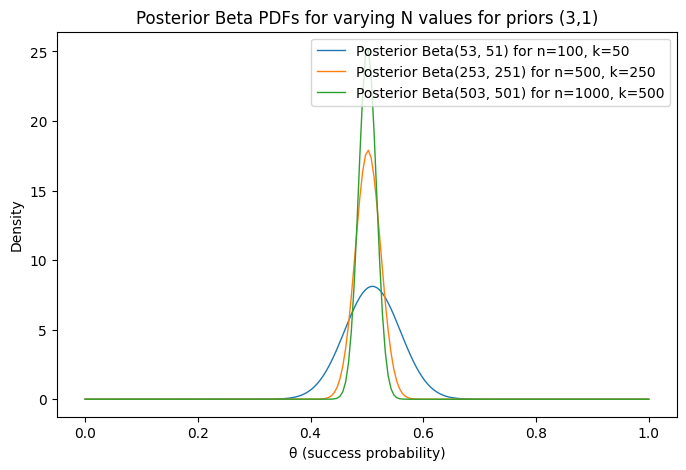

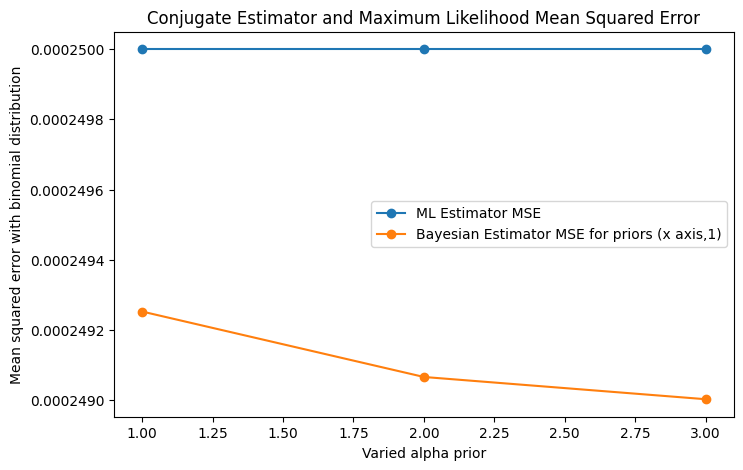

In [5]:
# --- Prior parameters ---
#lpha_prior = 1   # prior "successes"
#beta_prior = 1    # prior "failures"
alpha_priors = [1,2,3]
beta_priors = [1,1,1]
n_values = [100, 500, 1000]
k_values = [50, 250, 500]
ml_mses = []
bayes_mses = []
for alpha_prior, beta_prior in zip(alpha_priors, beta_priors):
    if alpha_prior == 3:
        loop_pdfs = []
        plt.figure(figsize=(8, 5))
        for n, k in zip(n_values, k_values):
            alpha_post = alpha_prior + k
            beta_post = beta_prior + (n - k)
            theta = np.linspace(0, 1, 200)
            loop_pdfs.append(beta.pdf(theta, alpha_post, beta_post))
            plt.plot(theta, beta.pdf(theta, alpha_post, beta_post), label=f"Posterior Beta({alpha_post}, {beta_post}) for n={n}, k={k}", linewidth=1)
        plt.title(f"Posterior Beta PDFs for varying N values for priors ({alpha_prior},{beta_prior})")
        plt.xlabel("θ (success probability)")
        plt.ylabel("Density")
        plt.legend()
        plt.show()
            
    # --- Observed data ---
    n = 1000   # number of trials
    k = 500 # number of successes

    # --- Posterior parameters ---
    alpha_post = alpha_prior + k
    beta_post = beta_prior + (n - k)

    ml_estimator = k/n
    bayes_estimator = (alpha_post + k) / (alpha_post + beta_post + n)
    ml_mse = ml_estimator * (1 - ml_estimator) / n
    ml_mses.append(ml_mse)
    bayes_mse =  beta.var(alpha_post,beta_post) +  (beta.mean(alpha_post, beta_post) - bayes_estimator)**2
    bayes_mses.append(bayes_mse)

plt.figure(figsize=(8, 5))
plt.plot(alpha_priors, ml_mses, label=f"ML Estimator MSE", marker='o')
plt.plot(alpha_priors, bayes_mses, label=f"Bayesian Estimator MSE for priors (x axis,1)", marker='o')
plt.title("Conjugate Estimator and Maximum Likelihood Mean Squared Error")
plt.xlabel("Varied alpha prior")
plt.ylabel("Mean squared error with binomial distribution")
plt.legend()
plt.show()

0.5554131754942719
0.6443305403954176
0.8238437950455033
0.8322321857576223
0.8809003455125886
0.8838052151342328


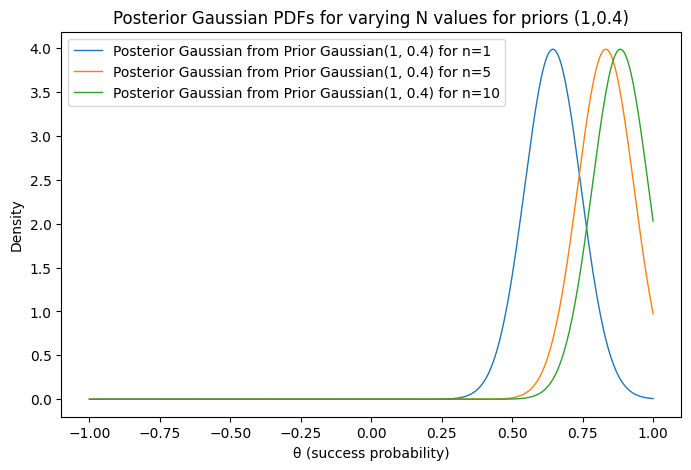

[0.0001, 0.0001, 0.0001]
[np.float64(9.991020175138824e-05), np.float64(9.993787045274473e-05), np.float64(9.995255297610784e-05)]


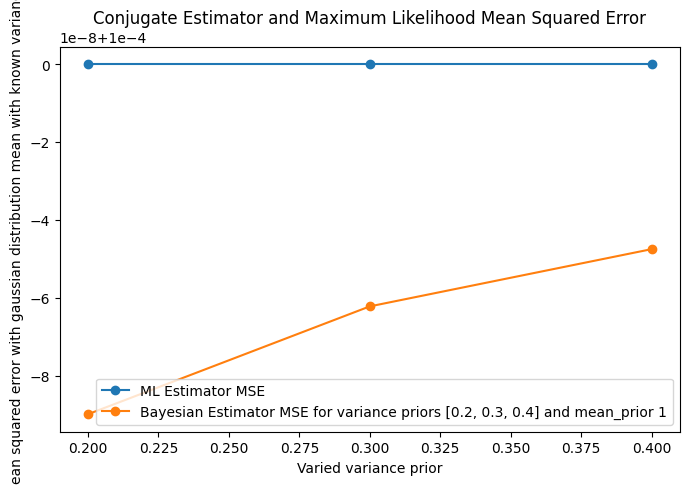

In [ ]:
variance_priors = [0.2,0.3,0.4]

mean_prior = 1
true_mean = 0.8
true_var = 0.1
n_values = [1,5, 10]

#say true mean and variance are 0.8 and 0.1 respectively as in the textbook
ml_mses = []
bayes_mses = []
n = 1000
normal_samples = np.random.normal(true_mean, true_var, n)
for variance_prior in variance_priors:
    
    ml_estimator = normal_samples.mean()
    bayes_estimator = mean_prior * (true_var/(n*variance_prior + true_var)) + ml_estimator * (n*variance_prior/(n*variance_prior + true_var))
    ml_mse = true_var / n
    ml_mses.append(ml_mse)
    bayes_mse = (true_var /(true_var + n * variance_prior)) **2 * (mean_prior - bayes_estimator)**2 + ml_mse * (n*variance_prior /(true_var + n * variance_prior))**2
    bayes_mses.append(bayes_mse)
    theta = np.linspace(0, 1, n)
    if variance_prior == 0.4:
        loop_pdfs = []
        plt.figure(figsize=(8, 5))
        for loopN in n_values:
            normal_samples = np.random.normal(true_mean, true_var, loopN)
            ml_estimator = normal_samples.mean()
            loop_bayes_estimator = mean_prior * (true_var/(loopN*variance_prior + true_var)) + ml_estimator * (loopN*variance_prior/(loopN*variance_prior + true_var))
            #loop_bayes_mse = (true_var /(true_var + loopN * variance_prior)) **2 * (mean_prior - bayes_estimator)**2 + ml_mse * (loopN*variance_prior /(true_var + loopN * variance_prior))**2
            theta = np.linspace(-1, 1, 400)
            plt.plot(theta, norm.pdf(theta, loop_bayes_estimator, true_var), label=f"Posterior Gaussian from Prior Gaussian({mean_prior}, {variance_prior}) for n={loopN}", linewidth=1)
        plt.title(f"Posterior Gaussian PDFs for varying N values for priors ({mean_prior},{variance_prior})")
        plt.xlabel("θ (success probability)")
        plt.ylabel("Density")
        plt.legend()
        plt.show()
plt.figure(figsize=(8, 5))
plt.plot(variance_priors, ml_mses, label=f"ML Estimator MSE", marker='o')
plt.plot(variance_priors, bayes_mses, label=f"Bayesian Estimator MSE for variance priors {variance_priors} and mean prior 1", marker='o')
plt.title("Conjugate Estimator and Maximum Likelihood Mean Squared Error")
plt.xlabel("Varied variance prior")
plt.ylabel("Mean squared error with gaussian distribution mean with known variance")
plt.legend()
plt.show()